In [1]:
import numpy as np
import pandas as pd
from functools import partial
%matplotlib inline

In [2]:
gau = np.random.normal(0,1,100)

In [25]:
def g0(lbd, sigma = 2):
    def g(x): 
        return 1/(np.exp((-x+lbd-2)*sigma) + 1) - 1/(np.exp((-x-lbd)*sigma)+1)
    gv = np.vectorize(g)
    return abs(np.mean(gv(gau)))

In [26]:
def g1(lbd, sigma = 2):
    def g(x): 
        return 1/(np.exp((-x+lbd)*sigma) + 1) - 1/(np.exp((-x-lbd+2)*sigma)+1)
    gv = np.vectorize(g)
    return abs(np.mean(gv(gau)))

In [58]:
lbd_list = np.arange(0,1,0.001)

In [59]:
g0_v = np.vectorize(partial(g0, sigma = 4))
g1_v = np.vectorize(partial(g1, sigma = 0.25))

In [60]:
df = pd.DataFrame({'lambda': lbd_list, 'g0(lambda)': g0_v(lbd_list), 'g1(lambda)': g1_v(lbd_list)})

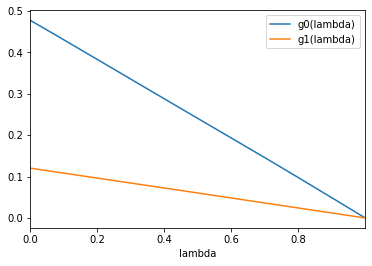

In [61]:
ax = df.plot(x = 'lambda', y = 'g0(lambda)')
df.plot(x = 'lambda', y = 'g1(lambda)', ax = ax)
None

In [62]:
df['g1(lambda)'][df['g0(lambda)'] > 2 * df['g1(lambda)']]

0      0.120336
1      0.120217
2      0.120098
3      0.119979
4      0.119860
         ...   
995    0.000605
996    0.000484
997    0.000363
998    0.000242
999    0.000121
Name: g1(lambda), Length: 1000, dtype: float64

In [65]:
df['lambda'][abs(df['g0(lambda)']) > 2 * abs(df['g1(lambda)'])]

0      0.000
1      0.001
2      0.002
3      0.003
4      0.004
       ...  
995    0.995
996    0.996
997    0.997
998    0.998
999    0.999
Name: lambda, Length: 1000, dtype: float64

In [76]:
def global_fv(local_fv):
    def g0_inverse(c):
        return df[df['g0(lambda)'] < c]['lambda'].iloc[0]
    def g1_inverse(c):
        return df[df['g1(lambda)'] < c]['lambda'].iloc[0]
    lbd0 = g0_inverse(local_fv)
    lbd1 = g1_inverse(local_fv)
    return (2 * local_fv + g0(lbd1) + g1(lbd0))/4 / local_fv

In [83]:
lfv_l = np.arange(0.01,0.12,0.1)
global_fv_v = np.vectorize(global_fv)
df_fv = pd.DataFrame({'local fairness violation': lfv_l, 'UFL global fairness violation / FFL global fairness violation': global_fv_v(lfv_l)})

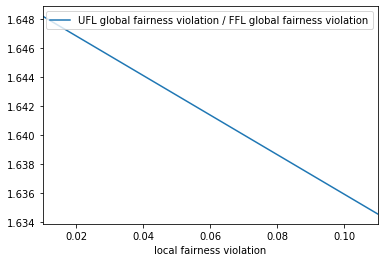

In [85]:
df_fv.plot(x = 'local fairness violation', y = 'UFL global fairness violation / FFL global fairness violation')
None